# EDA HOMICIDIOS

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ydata_profiling as ydp
from ydata_profiling import ProfileReport
from IPython.display import display

In [180]:
df_hechos = pd.read_excel('/Users/gaston/Documents/Carrera Data Analytics/Proyectos Individuales/Proyecto 2/PI_DA/Data/homicidios.xlsx',sheet_name = 'HECHOS')
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH   
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4  \
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  Altura   
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...     NaN  \
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ  ...     NaN   
2                         AV ENTRE RIOS 2034       AVENIDA  ...  2034.0   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA  ...     NaN   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA  ...     NaN   

                                 Cruce   
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.  \
1                  DE LOS CORRALES AV.   
2                                  NaN   
3             VILLEGAS, CONRADO, GRAL.   
4              SAENZ PE?A, LUIS, PRES.   

                               Dirección Normalizada COMUNA   
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...      8  \
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.      9   
2                                ENTRE RIOS AV. 2034      1   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.      8   
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.      1   

                                 XY (CABA)         pos x         pos y   
0    Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022  \
1    Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
2   Point (106684.29090040 99706.57687843)  -58.39040293  -34.63189362   
3    Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4  Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   

    PARTICIPANTES VICTIMA    ACUSADO  
0       MOTO-AUTO    MOTO       AUTO  
1  AUTO-PASAJEROS    AUTO  PASAJEROS  
2       MOTO-AUTO    MOTO       AUTO  
3         MOTO-SD    MOTO         SD  
4  MOTO-PASAJEROS    MOTO  PASAJEROS  

[5 rows x 21 columns]

In [181]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Decido utilizar la librería ydata_profiling como ayuda para tener un pantallazo rápido de las variables y características de los datos,
así como de valores nulos y/o faltantes.

In [192]:
# Crea un informe de perfil de datos
profile = ProfileReport(df_hechos)

# Mostrar el informe en pantalla
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

La primera decisión que tomo es eliminar la columna "Altura" ya que la misma pose un 81,5% de valores faltantes y cuando existen valores, el mismo
ya se encuentra también en la info de la columna "Lugar del hecho". Por lo tanto su info no es relevante

In [182]:
valores_faltantes_altura = df_hechos['Altura'].isnull().sum()
valores_faltantes_altura
porcentaje_faltantes = (valores_faltantes_altura * 100)/df_hechos.shape[0]
porcentaje_faltantes

81.46551724137932

In [183]:
df_hechos.drop('Altura', axis=1, inplace=True)
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA HH   
0  2016-0001           1 2016-01-01  2016   1   1  04:00:00  4  \
1  2016-0002           1 2016-01-02  2016   1   2  01:15:00  1   
2  2016-0003           1 2016-01-03  2016   1   3  07:00:00  7   
3  2016-0004           1 2016-01-10  2016   1  10  00:00:00  0   
4  2016-0005           1 2016-01-21  2016   1  21  05:20:00  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE             Calle   
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  PIEDRA BUENA AV.  \
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ    PAZ, GRAL. AV.   
2                         AV ENTRE RIOS 2034       AVENIDA    ENTRE RIOS AV.   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA    LARRAZABAL AV.   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA      SAN JUAN AV.   

                                 Cruce   
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.  \
1                  DE LOS CORRALES AV.   
2                                  NaN   
3             VILLEGAS, CONRADO, GRAL.   
4              SAENZ PE?A, LUIS, PRES.   

                               Dirección Normalizada  COMUNA   
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8  \
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   
2                                ENTRE RIOS AV. 2034       1   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8   
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1   

                                 XY (CABA)         pos x         pos y   
0    Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022  \
1    Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
2   Point (106684.29090040 99706.57687843)  -58.39040293  -34.63189362   
3    Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4  Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   

    PARTICIPANTES VICTIMA    ACUSADO  
0       MOTO-AUTO    MOTO       AUTO  
1  AUTO-PASAJEROS    AUTO  PASAJEROS  
2       MOTO-AUTO    MOTO       AUTO  
3         MOTO-SD    MOTO         SD  
4  MOTO-PASAJEROS    MOTO  PASAJEROS

La columna ID que es el índice de la tabla, no contiene valores duplicados ni extraños así que no realizo más análisis sobre ella.

## Número de Víctimas (columna N_VICTIMAS)

En primera instancia y solamente para verificar el reporte, verifico que no tiene valores faltantes

In [184]:
valores_faltantes_victimas = df_hechos['N_VICTIMAS'].isnull().sum()
valores_faltantes_victimas

0

Realizo un análisis estadístico utilizando el atributo describe y genero un gráfico de distribución para visualizar los valores

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64


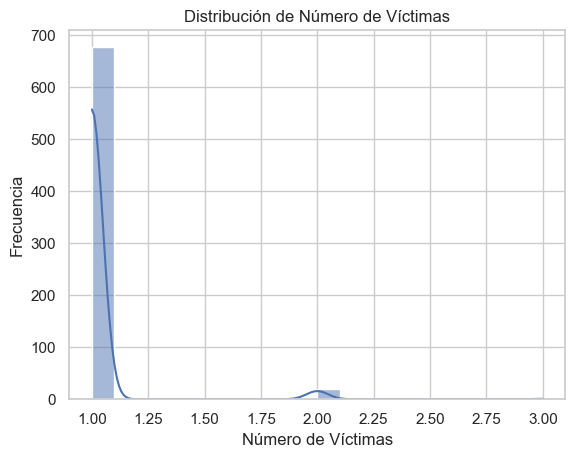

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Estadísticas descriptivas
print(df_hechos['N_VICTIMAS'].describe())

# Histograma con Seaborn
sns.histplot(data=df_hechos, x='N_VICTIMAS', bins=20, kde=True)
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Víctimas')
plt.show()



La estadística descriptiva revela que, en promedio, cada incidente involucra alrededor de 1.03 víctimas. Esto indica que la mayoría de los eventos tienden a tener una sola víctima, aunque ocasionalmente puede haber más de una. La baja desviación estándar de aproximadamente 0.18 sugiere que la cantidad de víctimas tiende a variar muy poco alrededor de esta media.

El valor mínimo en la columna es 1, lo que indica que en todos los incidentes, al menos una persona se ha visto afectada. Los percentiles, que representan la distribución de los datos, también revelan que el 25% de los eventos involucra a una sola víctima, al igual que el 50% (mediana) y el 75%. Esto respalda la idea de que la mayoría de los incidentes tienen una sola víctima.

Sin embargo, el valor máximo en la columna es 3, lo que sugiere que en algunos casos excepcionales, se han registrado hasta tres víctimas en un solo incidente. Aunque estos casos son menos comunes, aportan una dimensión adicional a la variabilidad en la cantidad de víctimas.

## Columa Fecha

In [186]:
import plotly.express as px

# Agrupar por año y contar los incidentes
incidentes_por_año = df_hechos.groupby(df_hechos['FECHA'].dt.year)['ID'].count().reset_index()

# Gráfico de líneas interactivo con Plotly
fig = px.line(incidentes_por_año, x='FECHA', y='ID', markers=True)
fig.update_layout(
    title='Tendencia de Incidentes a lo largo de los Años',
    title_x=0.5  # Este valor centra el título horizontalmente
)

fig.update_xaxes(title_text='Año')
fig.update_yaxes(title_text='Cantidad de Incidentes')
fig.show()


En el gráfico se aprecia claramente que desde el 2018 donde se registraron 143 siniestros (en la función abajo presentada realizo los cálculos), los mismos han bajado considerablemente, registrando el número más bajo de 78 en 2020.
Luego de investigar, encuentro en internet el siguiente artículo https://webpicking.com/baja-la-cantidad-de-victimas-fatales-en-siniestros-viales-en-caba/ donde puede explicarse la baja que registrada desde 2018 tras la implementación del primer "Plan de Seguridad Vial de la Ciudad de Buenos Aires" que guió las políticas de movilidad segura durante el período 2016-2019, donde se propuso la meta de disminuir 30% las víctimas fatales causadas por incidentes viales para el año 2019. 
Se observa también que el pico más bajo se registrí en 2020, el cuál es explicado claramente por la coyuntura de pandemia que dsminuyó considerablemente el tráfico de vehículos.

In [187]:
# Calcular el total de incidentes
total_incidentes = incidentes_por_año['ID'].sum()

# Calcular el porcentaje de cada año con respecto al total
incidentes_por_año['Porcentaje'] = round((incidentes_por_año['ID'] / total_incidentes) * 100)
incidentes_por_año = incidentes_por_año.rename(columns={'FECHA': 'Año', 'ID': 'Cantidad de Incidentes', 'Porcentaje': 'Porcentaje (%)'})


# Mostrar la tabla con los porcentajes
print(incidentes_por_año)


    Año  Cantidad de Incidentes  Porcentaje (%)
0  2016                     144            21.0
1  2017                     131            19.0
2  2018                     143            21.0
3  2019                     103            15.0
4  2020                      78            11.0
5  2021                      97            14.0


En cuanto a las columnas "AAAA", "MM" y "DD" no realizo más análisis que verificar que no tengan un % considerable de valore nulos o faltantes, ya que su info está toda contemplada en la columna "FECHA". Decido eliminar la columna "HORA" ya que utilizaré la columna "HH" que tiene la información de las horas en formato entero y es correcto para poder elaborar un histograma

In [188]:
df_hechos['AAAA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: AAAA
Non-Null Count  Dtype
--------------  -----
696 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [189]:
df_hechos['MM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: MM
Non-Null Count  Dtype
--------------  -----
696 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [190]:
df_hechos['DD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: DD
Non-Null Count  Dtype
--------------  -----
696 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [191]:
df_hechos.drop('HORA', axis=1, inplace=True)
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD HH   
0  2016-0001           1 2016-01-01  2016   1   1  4  \
1  2016-0002           1 2016-01-02  2016   1   2  1   
2  2016-0003           1 2016-01-03  2016   1   3  7   
3  2016-0004           1 2016-01-10  2016   1  10  0   
4  2016-0005           1 2016-01-21  2016   1  21  5   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE             Calle   
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  PIEDRA BUENA AV.  \
1          AV GRAL PAZ  Y AV DE LOS CORRALES      GRAL PAZ    PAZ, GRAL. AV.   
2                         AV ENTRE RIOS 2034       AVENIDA    ENTRE RIOS AV.   
3      AV LARRAZABAL Y GRAL VILLEGAS CONRADO       AVENIDA    LARRAZABAL AV.   
4  AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA        AVENIDA      SAN JUAN AV.   

                                 Cruce   
0  FERNANDEZ DE LA CRUZ, F., GRAL. AV.  \
1                  DE LOS CORRALES AV.   
2                                  NaN   
3             VILLEGAS, CONRADO, GRAL.   
4              SAENZ PE?A, LUIS, PRES.   

                               Dirección Normalizada  COMUNA   
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8  \
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   
2                                ENTRE RIOS AV. 2034       1   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8   
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1   

                                 XY (CABA)         pos x         pos y   
0    Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022  \
1    Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
2   Point (106684.29090040 99706.57687843)  -58.39040293  -34.63189362   
3    Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4  Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   

    PARTICIPANTES VICTIMA    ACUSADO  
0       MOTO-AUTO    MOTO       AUTO  
1  AUTO-PASAJEROS    AUTO  PASAJEROS  
2       MOTO-AUTO    MOTO       AUTO  
3         MOTO-SD    MOTO         SD  
4  MOTO-PASAJEROS    MOTO  PASAJEROS

Decido elaborar un histograma que me refleje la concentración de siniestros por hora utilizando la columna "HH"

In [192]:
print(df_hechos['HH'].describe())

count     696
unique     25
top         7
freq       41
Name: HH, dtype: int64


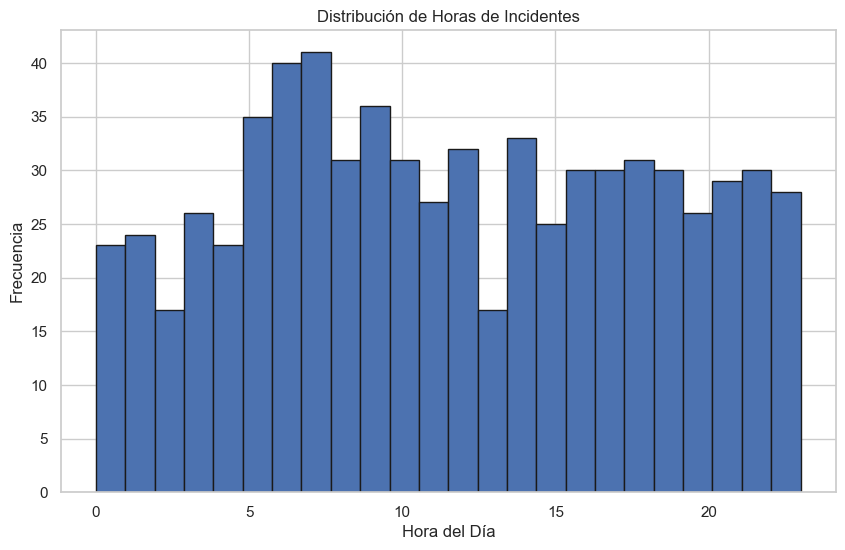

In [193]:
import matplotlib.pyplot as plt

# Histograma de horas excluyendo valores 'SD'
plt.figure(figsize=(10, 6))
plt.hist(df_hechos[df_hechos['HH'] != 'SD']['HH'].astype(int), bins=24, edgecolor='k')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de Horas de Incidentes')
plt.show()


También genero la siguiente función, para verificar en formato de tabla la info:

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra las filas con valores 'SD'
df_filtered = df_hechos[df_hechos['HH'] != 'SD']

# Convierte la columna 'HH' a tipo entero
df_filtered['HH'] = df_filtered['HH'].astype(int)

# Calcula la distribución de horas
hora_counts = df_filtered['HH'].value_counts().sort_index()

# Calcula el total de incidentes
total_incidentes = hora_counts.sum()

# Calcula la frecuencia relativa (porcentaje) para cada hora
hora_percentages = round((hora_counts / total_incidentes) * 100)

# Crea un DataFrame con las horas, la cantidad de incidentes y los porcentajes
tabla_horas_porcentaje = pd.DataFrame({'Hora': hora_counts.index, 'Cantidad de Incidentes': hora_counts.values, 'Porcentaje': hora_percentages.values})
tabla_horas_porcentaje = tabla_horas_porcentaje.sort_values(by='Cantidad de Incidentes', ascending=False)

# Muestra la tabla
print(tabla_horas_porcentaje)



    Hora  Cantidad de Incidentes  Porcentaje
7      7                      41         6.0
6      6                      40         6.0
9      9                      36         5.0
5      5                      35         5.0
14    14                      33         5.0
12    12                      32         5.0
8      8                      31         4.0
10    10                      31         4.0
18    18                      31         4.0
22    22                      30         4.0
19    19                      30         4.0
17    17                      30         4.0
16    16                      30         4.0
21    21                      29         4.0
23    23                      28         4.0
11    11                      27         4.0
20    20                      26         4.0
3      3                      26         4.0
15    15                      25         4.0
1      1                      24         3.0
4      4                      23         3.0
0      0  

/var/folders/_x/y99l7l9s60q1726y6701xbkw0000gn/T/ipykernel_16622/3373293610.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Por lo que se observa, el mayor pico de registros, se da entre las 6 y 7 AM, que podría explicarse por el tráfico a la hora de movilizarse al trabajo y a llevar a los niños a los colegios. Los registros más bajos son en la madrugada (2 AM) que puede explicarse ya que la mayoría se encuentra descansando.

Decido eliminar la columna "LUGAR_DEL_HECHO" y dejar solamente la columna "Dirección Normalizada" por tener la misma información pero detallada de mejor manera y para esta última solo analizaré que no tenga un importante porcentaje de valores nulos o faltantes.

In [196]:
df_hechos.drop('LUGAR_DEL_HECHO', axis=1, inplace=True)
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD HH TIPO_DE_CALLE   
0  2016-0001           1 2016-01-01  2016   1   1  4       AVENIDA  \
1  2016-0002           1 2016-01-02  2016   1   2  1      GRAL PAZ   
2  2016-0003           1 2016-01-03  2016   1   3  7       AVENIDA   
3  2016-0004           1 2016-01-10  2016   1  10  0       AVENIDA   
4  2016-0005           1 2016-01-21  2016   1  21  5       AVENIDA   

              Calle                                Cruce   
0  PIEDRA BUENA AV.  FERNANDEZ DE LA CRUZ, F., GRAL. AV.  \
1    PAZ, GRAL. AV.                  DE LOS CORRALES AV.   
2    ENTRE RIOS AV.                                  NaN   
3    LARRAZABAL AV.             VILLEGAS, CONRADO, GRAL.   
4      SAN JUAN AV.              SAENZ PE?A, LUIS, PRES.   

                               Dirección Normalizada  COMUNA   
0  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8  \
1               PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   
2                                ENTRE RIOS AV. 2034       1   
3          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8   
4            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1   

                                 XY (CABA)         pos x         pos y   
0    Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022  \
1    Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
2   Point (106684.29090040 99706.57687843)  -58.39040293  -34.63189362   
3    Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4  Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   

    PARTICIPANTES VICTIMA    ACUSADO  
0       MOTO-AUTO    MOTO       AUTO  
1  AUTO-PASAJEROS    AUTO  PASAJEROS  
2       MOTO-AUTO    MOTO       AUTO  
3         MOTO-SD    MOTO         SD  
4  MOTO-PASAJEROS    MOTO  PASAJEROS

In [197]:
df_hechos['Dirección Normalizada'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: Dirección Normalizada
Non-Null Count  Dtype 
--------------  ----- 
688 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Para analizar la distribución de incidentes según el Tipo de Calle, utilizo un gráfico de barras que me permite visualizar en cuál se da el mayor número de registros.

In [198]:
df_hechos['TIPO_DE_CALLE'].describe()

count         696
unique          4
top       AVENIDA
freq          429
Name: TIPO_DE_CALLE, dtype: object

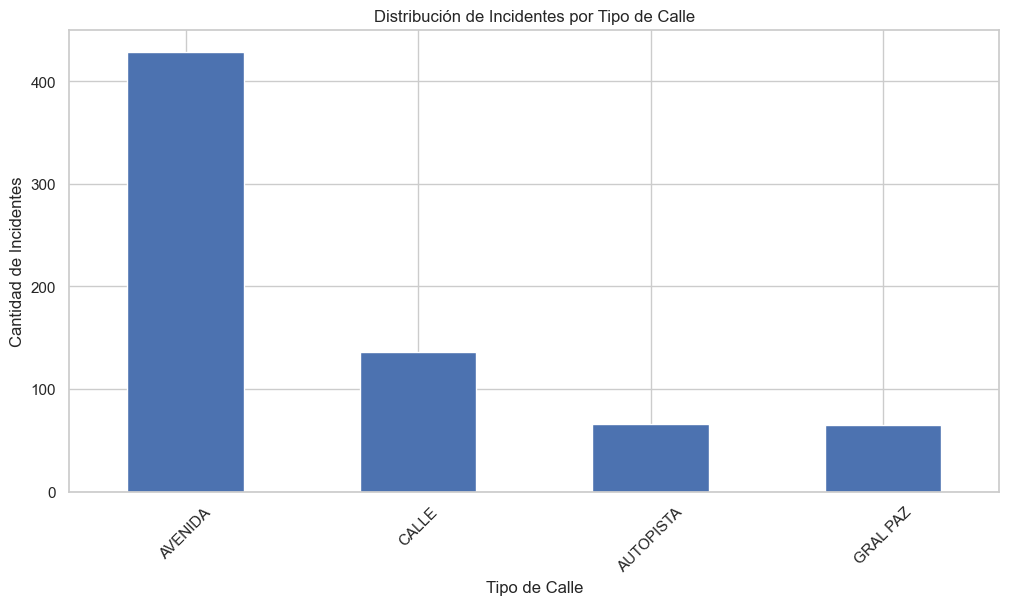

In [199]:
# Gráfico de barras para TIPO_DE_CALLE
plt.figure(figsize=(12, 6))
df_hechos['TIPO_DE_CALLE'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Incidentes')
plt.title('Distribución de Incidentes por Tipo de Calle')
plt.xticks(rotation=45)
plt.show()


In [200]:
import pandas as pd

def mostrar_tabla(df, columna):
    # Crear una tabla con la cantidad de incidentes por tipo de calle
    tabla_cantidad = df[columna].value_counts().reset_index()
    tabla_cantidad.columns = [columna, 'Cantidad de Incidentes']

    # Calcular el porcentaje y redondearlo
    total_incidentes = tabla_cantidad['Cantidad de Incidentes'].sum()
    tabla_cantidad['Porcentaje (%)'] = (tabla_cantidad['Cantidad de Incidentes'] / total_incidentes * 100).round(2)

    # Ordenar la tabla por cantidad de incidentes en orden descendente
    tabla_cantidad = tabla_cantidad.sort_values(by='Cantidad de Incidentes', ascending=False)

    # Mostrar la tabla
    print(tabla_cantidad)

# Llama a la función con tu DataFrame y la columna deseada
mostrar_tabla(df_hechos, 'TIPO_DE_CALLE')


  TIPO_DE_CALLE  Cantidad de Incidentes  Porcentaje (%)
0       AVENIDA                     429           61.64
1         CALLE                     136           19.54
2     AUTOPISTA                      66            9.48
3      GRAL PAZ                      65            9.34


Podemos observar que el 60% de los registros se dan en avenidas y como vimos anteriormente, en horarios diurnos que es cuando las personas circulan con mayor frecuencia por estas vías, puede explicarse por excesos de velocidad en estas vías, falta de controles en intersecciones peligrosas que veriricaremos cuando analicemos la información de "Intersecciones", alta circulación de todo tipo de vehículos incluyendo bicicletas y peatones. Por otra parte, la poca circulación de peatones y biciclestas puede explicar la baja tasa registraza en Gral Paz.

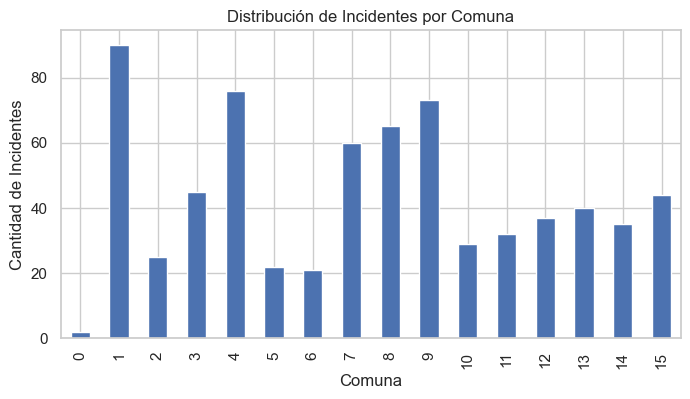

In [201]:
# Gráfico de barras para COMUNA
plt.figure(figsize=(8, 4))
df_hechos['COMUNA'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Incidentes')
plt.title('Distribución de Incidentes por Comuna')
plt.show()


In [202]:
import pandas as pd

# Obtener la cuenta de incidentes por comuna
comuna_counts = df_hechos['COMUNA'].value_counts().sort_index()

# Calcular los porcentajes
total_incidentes = comuna_counts.sum()
porcentajes = (comuna_counts / total_incidentes * 100).round(2)

# Crear un DataFrame con las cantidades y porcentajes
tabla_comuna = pd.DataFrame({'Comuna': comuna_counts.index, 'Cantidad de Incidentes': comuna_counts, '%': porcentajes})

# Ordenar la tabla descendentemente por la columna '%'
tabla_comuna = tabla_comuna.sort_values(by='%', ascending=False)

# Mostrar la tabla ordenada
print(tabla_comuna)


        Comuna  Cantidad de Incidentes      %
COMUNA                                       
1            1                      90  12.93
4            4                      76  10.92
9            9                      73  10.49
8            8                      65   9.34
7            7                      60   8.62
3            3                      45   6.47
15          15                      44   6.32
13          13                      40   5.75
12          12                      37   5.32
14          14                      35   5.03
11          11                      32   4.60
10          10                      29   4.17
2            2                      25   3.59
5            5                      22   3.16
6            6                      21   3.02
0            0                       2   0.29


Como información adicional, decido armar un dataframe a partir de un excel que armé con los barrios por comuna como para identificar los siniestros en el contexto de los barrios de CABA. Para esto lo cruzo luego con la info de siniestros por comuna y agrego a los barrios como labels en eje "y" luego de realizar un gráfico de barras horizontales por el largo de las etiquetas.

In [203]:
df_barrios = pd.read_excel('/Users/gaston/Documents/Carrera Data Analytics/Proyectos Individuales/Proyecto 2/PI_DA/Data/Barrios por comuna.xlsx')
df_barrios.head()

COMUNA                                            BARRIOS
0       1  Retiro, San Nicolás, Puerto Madero, San Telmo,...
1       2                                           Recoleta
2       3                          Balvanera y San Cristóbal
3       4  La Boca, Barracas, Parque Patricios y Nueva Po...
4       5                                    Almagro y Boedo

In [204]:
# Utilizo merge para unir df_hechos y df_barrios por la columna 'COMUNA'
df_hechos = df_hechos.merge(df_barrios, on='COMUNA', how='left')

In [205]:
df_hechos

ID  N_VICTIMAS      FECHA  AAAA  MM  DD  HH TIPO_DE_CALLE   
0    2016-0001           1 2016-01-01  2016   1   1   4       AVENIDA  \
1    2016-0002           1 2016-01-02  2016   1   2   1      GRAL PAZ   
2    2016-0003           1 2016-01-03  2016   1   3   7       AVENIDA   
3    2016-0004           1 2016-01-10  2016   1  10   0       AVENIDA   
4    2016-0005           1 2016-01-21  2016   1  21   5       AVENIDA   
..         ...         ...        ...   ...  ..  ..  ..           ...   
691  2021-0093           1 2021-12-13  2021  12  13  17       AVENIDA   
692  2021-0094           1 2021-12-20  2021  12  20   1     AUTOPISTA   
693  2021-0095           1 2021-12-30  2021  12  30   0       AVENIDA   
694  2021-0096           1 2021-12-15  2021  12  15  10       AVENIDA   
695  2021-0097           1 2021-11-18  2021  11  18   6         CALLE   

                            Calle                                Cruce   
0                PIEDRA BUENA AV.  FERNANDEZ DE LA CRUZ, F., GRAL. AV.  \
1                  PAZ, GRAL. AV.                  DE LOS CORRALES AV.   
2                  ENTRE RIOS AV.                                  NaN   
3                  LARRAZABAL AV.             VILLEGAS, CONRADO, GRAL.   
4                    SAN JUAN AV.              SAENZ PE?A, LUIS, PRES.   
..                            ...                                  ...   
691                   RIESTRA AV.                                  MOM   
692  DELLEPIANE, LUIS, TTE. GRAL.                          LACARRA AV.   
693                     GAONA AV.                              TERRADA   
694                PERON, EVA AV.                                  NaN   
695           PADRE CARLOS MUJICA                                  NaN   

                                 Dirección Normalizada  COMUNA   
0    PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8  \
1                 PAZ, GRAL. AV. y DE LOS CORRALES AV.       9   
2                                  ENTRE RIOS AV. 2034       1   
3            LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8   
4              SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1   
..                                                 ...     ...   
691                                  RIESTRA AV. y MOM       7   
692         DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.       9   
693                                GAONA AV. y TERRADA      11   
694                                PERON, EVA AV. 4071       9   
695                            PADRE CARLOS MUGICA 709       1   

                                   XY (CABA)         pos x         pos y   
0      Point (98896.78238426 93532.43437792)  -58.47533969  -34.68757022  \
1      Point (95832.05571093 95505.41641999)  -58.50877521  -34.66977709   
2     Point (106684.29090040 99706.57687843)  -58.39040293  -34.63189362   
3      Point (99840.65224780 94269.16534422)  -58.46503904  -34.68092974   
4    Point (106980.32827929 100752.16915795)  -58.38718297  -34.62246630   
..                                       ...           ...           ...   
691   Point (102728.60090138 98186.24929177)  -58.43353773  -34.64561636   
692    Point (99624.29795829 97569.69801131)  -58.46739825  -34.65117757   
693   Point (99116.45492358 101045.23284826)  -58.47293407  -34.61984745   
694    Point (99324.54463985 97676.26932409)  -58.47066794  -34.65021673   
695  Point (107664.16647795 104708.63962087)  -58.37976155  -34.58679619   

      PARTICIPANTES    VICTIMA    ACUSADO   
0         MOTO-AUTO       MOTO       AUTO  \
1    AUTO-PASAJEROS       AUTO  PASAJEROS   
2         MOTO-AUTO       MOTO       AUTO   
3           MOTO-SD       MOTO         SD   
4    MOTO-PASAJEROS       MOTO  PASAJEROS   
..              ...        ...        ...   
691       MOTO-AUTO       MOTO       AUTO   
692       MOTO-AUTO       MOTO       AUTO   
693     MOTO-CARGAS       MOTO     CARGAS   
694     AUTO-CARGAS       AUTO     CARGAS   
695  BICICLETA-AUTO  BICICLETA       AUTO   


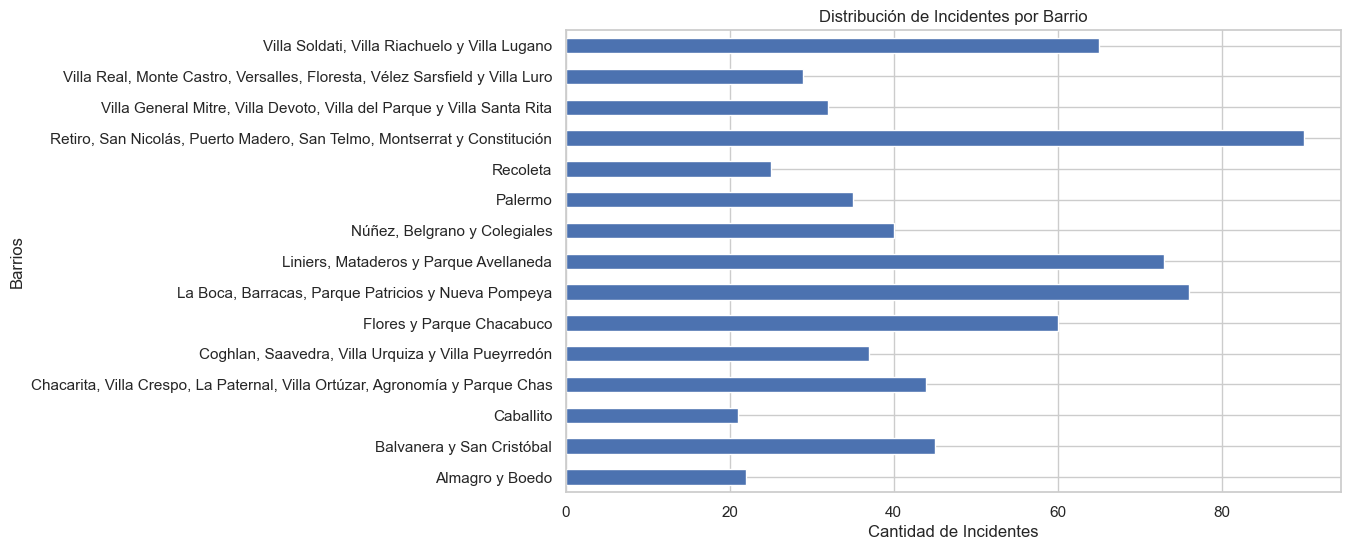

In [206]:
import matplotlib.pyplot as plt

# Gráfico de barras horizontales para BARRIOS
plt.figure(figsize=(10, 6))
df_hechos['BARRIOS'].value_counts().sort_index().plot(kind='barh')  # Utiliza 'barh' en lugar de 'bar'
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Barrios')
plt.title('Distribución de Incidentes por Barrio')
plt.show()


Luego de observar esta información, parece coherente que los barrios con más movimiento como ser Retiro y Puerto Madero, registren un mayor número de incidentes.

Decido utilizar la información de la columna "Dirección Normalizada" ya que tiene la info de las 2 calles en caso de intersecciones y utilizarla para analizar las intersecciones con más registros. Por esta misma razón, elimino del dataset la columna "Cruce".

In [207]:
df_hechos.drop('Cruce', axis=1, inplace=True)
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD HH TIPO_DE_CALLE   
0  2016-0001           1 2016-01-01  2016   1   1  4       AVENIDA  \
1  2016-0002           1 2016-01-02  2016   1   2  1      GRAL PAZ   
2  2016-0003           1 2016-01-03  2016   1   3  7       AVENIDA   
3  2016-0004           1 2016-01-10  2016   1  10  0       AVENIDA   
4  2016-0005           1 2016-01-21  2016   1  21  5       AVENIDA   

              Calle                              Dirección Normalizada   
0  PIEDRA BUENA AV.  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...  \
1    PAZ, GRAL. AV.               PAZ, GRAL. AV. y DE LOS CORRALES AV.   
2    ENTRE RIOS AV.                                ENTRE RIOS AV. 2034   
3    LARRAZABAL AV.          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.   
4      SAN JUAN AV.            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.   

   COMUNA                                XY (CABA)         pos x   
0       8    Point (98896.78238426 93532.43437792)  -58.47533969  \
1       9    Point (95832.05571093 95505.41641999)  -58.50877521   
2       1   Point (106684.29090040 99706.57687843)  -58.39040293   
3       8    Point (99840.65224780 94269.16534422)  -58.46503904   
4       1  Point (106980.32827929 100752.16915795)  -58.38718297   

          pos y   PARTICIPANTES VICTIMA    ACUSADO   
0  -34.68757022       MOTO-AUTO    MOTO       AUTO  \
1  -34.66977709  AUTO-PASAJEROS    AUTO  PASAJEROS   
2  -34.63189362       MOTO-AUTO    MOTO       AUTO   
3  -34.68092974         MOTO-SD    MOTO         SD   
4  -34.62246630  MOTO-PASAJEROS    MOTO  PASAJEROS   

                                             BARRIOS  
0      Villa Soldati, Villa Riachuelo y Villa Lugano  
1             Liniers, Mataderos y Parque Avellaneda  
2  Retiro, San Nicolás, Puerto Madero, San Telmo,...  
3      Villa Soldati, Villa Riachuelo y Villa Lugano  
4  Retiro, San Nicolás, Puerto Madero, San Telmo,...

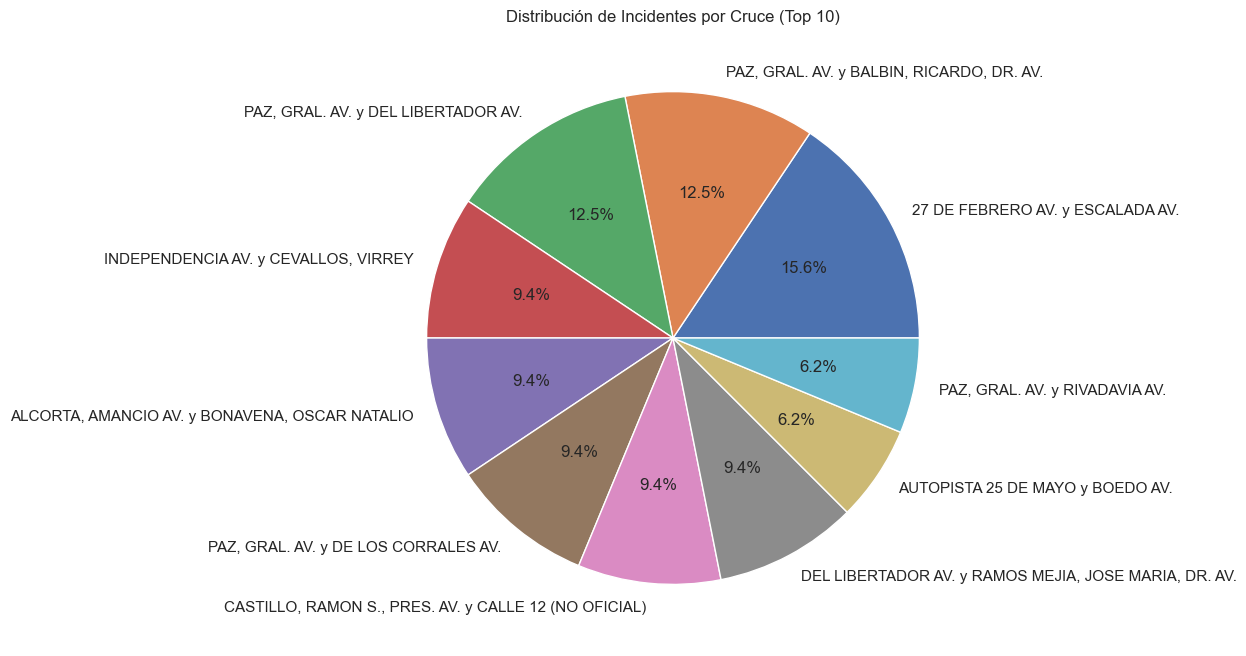

In [208]:
import matplotlib.pyplot as plt

# Gráfico de pastel para Cruce
plt.figure(figsize=(8, 8))
df_hechos['Dirección Normalizada'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Incidentes por Cruce (Top 10)')
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()


In [209]:
# Creao un DataFrame con los datos de "Dirección Normalizada"
data = df_hechos['Dirección Normalizada'].value_counts().head(10).reset_index()
data.columns = ['Cruce', 'Cantidad de Incidentes']

# Creo una tabla utilizando pandas
tabla = pd.DataFrame(data)

# Imprimo la tabla
print(tabla)


                                               Cruce  Cantidad de Incidentes
0                   27 DE FEBRERO AV. y ESCALADA AV.                       5
1          PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.                       4
2                PAZ, GRAL. AV. y DEL LIBERTADOR AV.                       4
3               INDEPENDENCIA AV. y CEVALLOS, VIRREY                       3
4     ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO                       3
5               PAZ, GRAL. AV. y DE LOS CORRALES AV.                       3
6  CASTILLO, RAMON S., PRES. AV. y CALLE 12 (NO O...                       3
7  DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ...                       3
8                   AUTOPISTA 25 DE MAYO y BOEDO AV.                       2
9                     PAZ, GRAL. AV. y RIVADAVIA AV.                       2


El análisis EDA revela información interesante sobre los cruces de calles más frecuentes en relación con la cantidad de incidentes registrados. En el conjunto de datos, se observa que el cruce "27 DE FEBRERO AV. y ESCALADA AV." es el más recurrente, con un total de 5 incidentes registrados en ese lugar. Le siguen de cerca otros cruces destacados como "PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV." y "PAZ, GRAL. AV. y DEL LIBERTADOR AV." con 4 incidentes cada uno. Además, varios cruces comparten una frecuencia de 3 incidentes, lo que sugiere áreas de interés adicional para analizar.

Decido eliminar la columna "XY (CABA)" y quedarme con las columnas "pos x" y "pos y" para la geolocalización.

In [210]:
df_hechos.drop('XY (CABA)', axis=1, inplace=True)
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD HH TIPO_DE_CALLE   
0  2016-0001           1 2016-01-01  2016   1   1  4       AVENIDA  \
1  2016-0002           1 2016-01-02  2016   1   2  1      GRAL PAZ   
2  2016-0003           1 2016-01-03  2016   1   3  7       AVENIDA   
3  2016-0004           1 2016-01-10  2016   1  10  0       AVENIDA   
4  2016-0005           1 2016-01-21  2016   1  21  5       AVENIDA   

              Calle                              Dirección Normalizada   
0  PIEDRA BUENA AV.  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...  \
1    PAZ, GRAL. AV.               PAZ, GRAL. AV. y DE LOS CORRALES AV.   
2    ENTRE RIOS AV.                                ENTRE RIOS AV. 2034   
3    LARRAZABAL AV.          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.   
4      SAN JUAN AV.            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.   

   COMUNA         pos x         pos y   PARTICIPANTES VICTIMA    ACUSADO   
0       8  -58.47533969  -34.68757022       MOTO-AUTO    MOTO       AUTO  \
1       9  -58.50877521  -34.66977709  AUTO-PASAJEROS    AUTO  PASAJEROS   
2       1  -58.39040293  -34.63189362       MOTO-AUTO    MOTO       AUTO   
3       8  -58.46503904  -34.68092974         MOTO-SD    MOTO         SD   
4       1  -58.38718297  -34.62246630  MOTO-PASAJEROS    MOTO  PASAJEROS   

                                             BARRIOS  
0      Villa Soldati, Villa Riachuelo y Villa Lugano  
1             Liniers, Mataderos y Parque Avellaneda  
2  Retiro, San Nicolás, Puerto Madero, San Telmo,...  
3      Villa Soldati, Villa Riachuelo y Villa Lugano  
4  Retiro, San Nicolás, Puerto Madero, San Telmo,...

Para las columnas "pos x" y "pos y", encuentro que algunos registos no tienen información y fueron completados con ".", por lo que decido sustituirlos por "NaN" para evitar errores luego al utilizar las coordenadas

In [211]:
# Cuento los valores "." en la columna "pos x"
count_dot_x = (df_hechos['pos x'] == ".").sum()

# Cuento los valores "." en la columna "pos y"
count_dot_y = (df_hechos['pos y'] == ".").sum()

# Imprimo los resultados
print(f'Cantidad de "." en la columna "pos x": {count_dot_x}')
print(f'Cantidad de "." en la columna "pos y": {count_dot_y}')


Cantidad de "." en la columna "pos x": 12
Cantidad de "." en la columna "pos y": 12


In [212]:
# Reemplazo los valores "." por NaN en la columna "pos x"
df_hechos['pos x'] = df_hechos['pos x'].replace(".", np.nan)

# Reemplazo los valores "." por NaN en la columna "pos y"
df_hechos['pos y'] = df_hechos['pos y'].replace(".", np.nan)


In [213]:
df_hechos.head()

ID  N_VICTIMAS      FECHA  AAAA  MM  DD HH TIPO_DE_CALLE   
0  2016-0001           1 2016-01-01  2016   1   1  4       AVENIDA  \
1  2016-0002           1 2016-01-02  2016   1   2  1      GRAL PAZ   
2  2016-0003           1 2016-01-03  2016   1   3  7       AVENIDA   
3  2016-0004           1 2016-01-10  2016   1  10  0       AVENIDA   
4  2016-0005           1 2016-01-21  2016   1  21  5       AVENIDA   

              Calle                              Dirección Normalizada   
0  PIEDRA BUENA AV.  PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...  \
1    PAZ, GRAL. AV.               PAZ, GRAL. AV. y DE LOS CORRALES AV.   
2    ENTRE RIOS AV.                                ENTRE RIOS AV. 2034   
3    LARRAZABAL AV.          LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.   
4      SAN JUAN AV.            SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.   

   COMUNA         pos x         pos y   PARTICIPANTES VICTIMA    ACUSADO   
0       8  -58.47533969  -34.68757022       MOTO-AUTO    MOTO       AUTO  \
1       9  -58.50877521  -34.66977709  AUTO-PASAJEROS    AUTO  PASAJEROS   
2       1  -58.39040293  -34.63189362       MOTO-AUTO    MOTO       AUTO   
3       8  -58.46503904  -34.68092974         MOTO-SD    MOTO         SD   
4       1  -58.38718297  -34.62246630  MOTO-PASAJEROS    MOTO  PASAJEROS   

                                             BARRIOS  
0      Villa Soldati, Villa Riachuelo y Villa Lugano  
1             Liniers, Mataderos y Parque Avellaneda  
2  Retiro, San Nicolás, Puerto Madero, San Telmo,...  
3      Villa Soldati, Villa Riachuelo y Villa Lugano  
4  Retiro, San Nicolás, Puerto Madero, San Telmo,...

Decido analizar la columna "Participantes" realizando un Top 10

In [214]:
df_hechos['PARTICIPANTES'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: PARTICIPANTES
Non-Null Count  Dtype 
--------------  ----- 
696 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [215]:
df_hechos['PARTICIPANTES'].describe()

count                  696
unique                  41
top       PEATON-PASAJEROS
freq                   105
Name: PARTICIPANTES, dtype: object

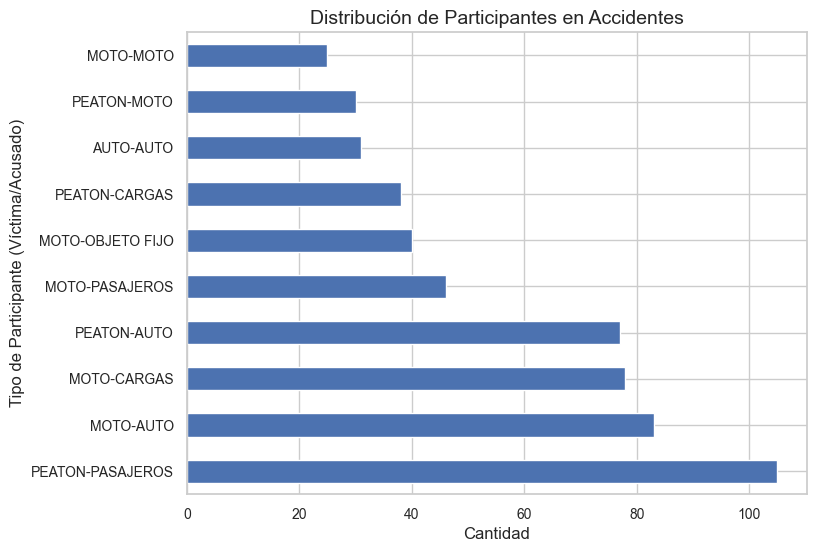

In [216]:
# Contar la ocurrencia de cada tipo de participante
conteo_participantes = df_hechos['PARTICIPANTES'].value_counts().head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
conteo_participantes.plot(kind='barh')  # Usar 'barh' para gráfico horizontal
plt.title('Distribución de Participantes en Accidentes', fontsize=14)  # Reducir tamaño de letra del título
plt.xlabel('Cantidad', fontsize=12)  # Reducir tamaño de letra del eje x
plt.ylabel('Tipo de Participante (Víctima/Acusado)', fontsize=12)  # Reducir tamaño de letra del eje y
plt.xticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje x
plt.yticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje y
plt.show()


Al examinar los datos, se destaca que la categoría 'Peatón-Pasajeros', con el formato (Víctima/Acusado), muestra la mayor cantidad de registros. Sin embargo, es importante señalar que este patrón podría deberse a una posible interpretación errónea en la clasificación de los involucrados. Según el diccionario de datos, un 'pasajero' se define como 'personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotransporte público de pasajeros/as y ómnibus de larga distancia'. Por lo tanto, es probable que en algunos casos se haya intentado representar la situación en la que la víctima es un peatón y el acusado sea, por ejemplo, un conductor de un vehículo de transporte público. Esta observación resalta la importancia de una revisión más detallada de la clasificación de los involucrados para garantizar la precisión de los datos y su interpretación adecuada en futuros análisis y decisiones relacionadas con la seguridad vial

Para las columnas "VICTIMA" y "ACUSADO", decido también realizar un top 10 para identificar los casos mas alarmantes

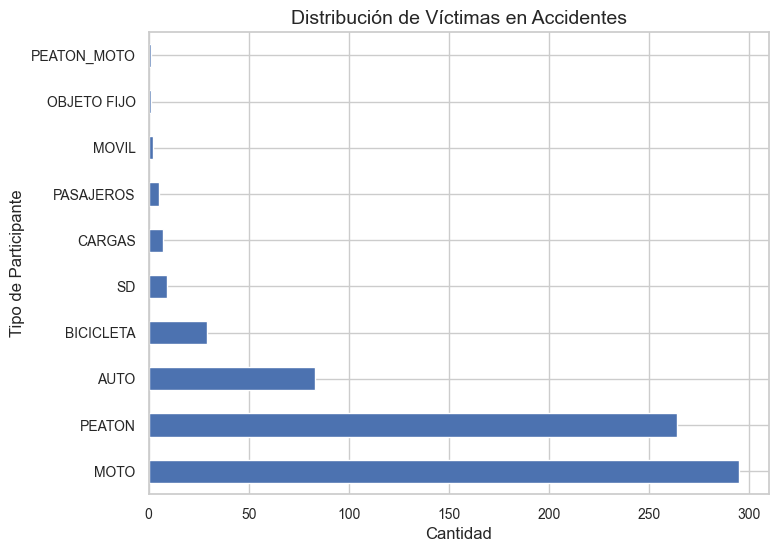

In [217]:
# Contar la ocurrencia de cada tipo de participante
conteo_participantes = df_hechos['VICTIMA'].value_counts().head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
conteo_participantes.plot(kind='barh')  # Usar 'barh' para gráfico horizontal
plt.title('Distribución de Víctimas en Accidentes', fontsize=14)  # Reducir tamaño de letra del título
plt.xlabel('Cantidad', fontsize=12)  # Reducir tamaño de letra del eje x
plt.ylabel('Tipo de Participante', fontsize=12)  # Reducir tamaño de letra del eje y
plt.xticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje x
plt.yticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje y
plt.show()

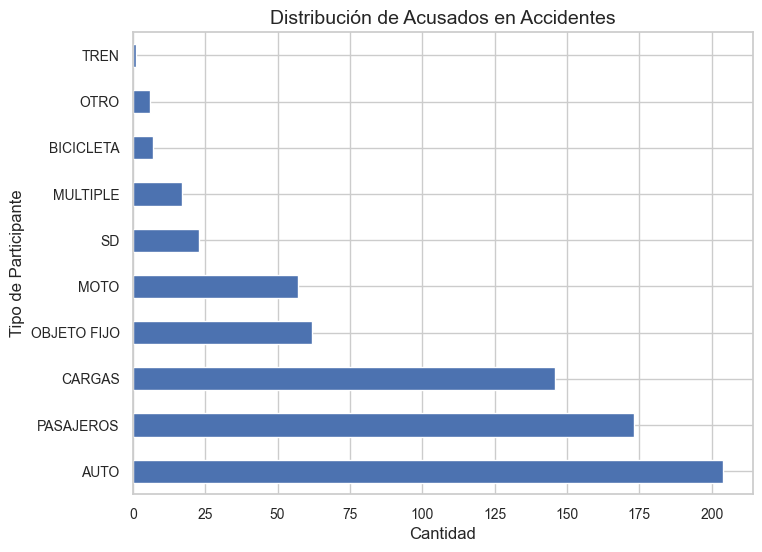

In [218]:
# Contar la ocurrencia de cada tipo de participante
conteo_participantes = df_hechos['ACUSADO'].value_counts().head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
conteo_participantes.plot(kind='barh')  # Usar 'barh' para gráfico horizontal
plt.title('Distribución de Acusados en Accidentes', fontsize=14)  # Reducir tamaño de letra del título
plt.xlabel('Cantidad', fontsize=12)  # Reducir tamaño de letra del eje x
plt.ylabel('Tipo de Participante', fontsize=12)  # Reducir tamaño de letra del eje y
plt.xticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje x
plt.yticks(fontsize=10)  # Reducir tamaño de letra de las etiquetas del eje y
plt.show()

Cuando analizamos la información de manera separada, enfocándonos en 'Víctimas' y 'Acusados', se revelan patrones interesantes en relación con los tipos de vehículos involucrados en los incidentes. En el caso de las 'Víctimas', se destaca que las motocicletas son las que registran la mayor cantidad de incidentes. Esta tendencia puede explicarse por la vulnerabilidad inherente de las motocicletas en las vías de alto tráfico, así como la urgencia en los servicios de entrega que involucran este tipo de vehículos. Además, algunos incidentes pueden estar relacionados con conductores que no respetan las normas de tráfico o que participan en carreras en las vías.

Por otro lado, al analizar los 'Acusados', tiene sentido que los automóviles representen la mayoría de los registros. Esto se ajusta a la información adicional sobre las horas de mayor incidencia, que confirma que son los automóviles los que más circulan por las diversas vías, especialmente durante las 'horas pico'. Esta mayor presencia de automóviles en las carreteras durante períodos de tráfico intenso está en línea con la mayor cantidad de incidentes en los que están involucrados como acusados. Este análisis resalta la importancia de considerar tanto la cantidad de vehículos en las vías como sus comportamientos al evaluar la seguridad vial y las estrategias para reducir los incidentes.

# EDA VICTIMAS

In [219]:
df_victimas = pd.read_excel('/Users/gaston/Documents/Carrera Data Analytics/Proyectos Individuales/Proyecto 2/PI_DA/Data/homicidios.xlsx',sheet_name = 'VICTIMAS')
df_victimas.head()

ID_hecho      FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD   
0  2016-0001 2016-01-01  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19  \
1  2016-0002 2016-01-02  2016   1   2  CONDUCTOR    AUTO  MASCULINO   70   
2  2016-0003 2016-01-03  2016   1   3  CONDUCTOR    MOTO  MASCULINO   30   
3  2016-0004 2016-01-10  2016   1  10  CONDUCTOR    MOTO  MASCULINO   18   
4  2016-0005 2016-01-21  2016   1  21  CONDUCTOR    MOTO  MASCULINO   29   

   FECHA_FALLECIMIENTO  
0  2016-01-01 00:00:00  
1  2016-01-02 00:00:00  
2  2016-01-03 00:00:00  
3                   SD  
4  2016-02-01 00:00:00

In [220]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Para este Dataset, decido quedarme solamente con las columnas "ID_hecho", "ROL", "VICTIMA", "SEXO", "EDAD", "FECHA_FALLECIMIENTO" ya que son las que contienen información adicional referente a las víctimas, que no tenía el anterior Dataset.

In [221]:
df_victimas = df_victimas[['ID_hecho','ROL', 'VICTIMA','SEXO','EDAD']]
df_victimas.head()

ID_hecho        ROL VICTIMA       SEXO EDAD
0  2016-0001  CONDUCTOR    MOTO  MASCULINO   19
1  2016-0002  CONDUCTOR    AUTO  MASCULINO   70
2  2016-0003  CONDUCTOR    MOTO  MASCULINO   30
3  2016-0004  CONDUCTOR    MOTO  MASCULINO   18
4  2016-0005  CONDUCTOR    MOTO  MASCULINO   29

Definiendo al "ROL" como la posición relativa al vehículo que presentaba la víctima en el momento del siniestro, realizamos un gráfico de barras para conocer la distribución de los roles

In [222]:
rol_counts = df_victimas['ROL'].value_counts()
print(rol_counts)

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64


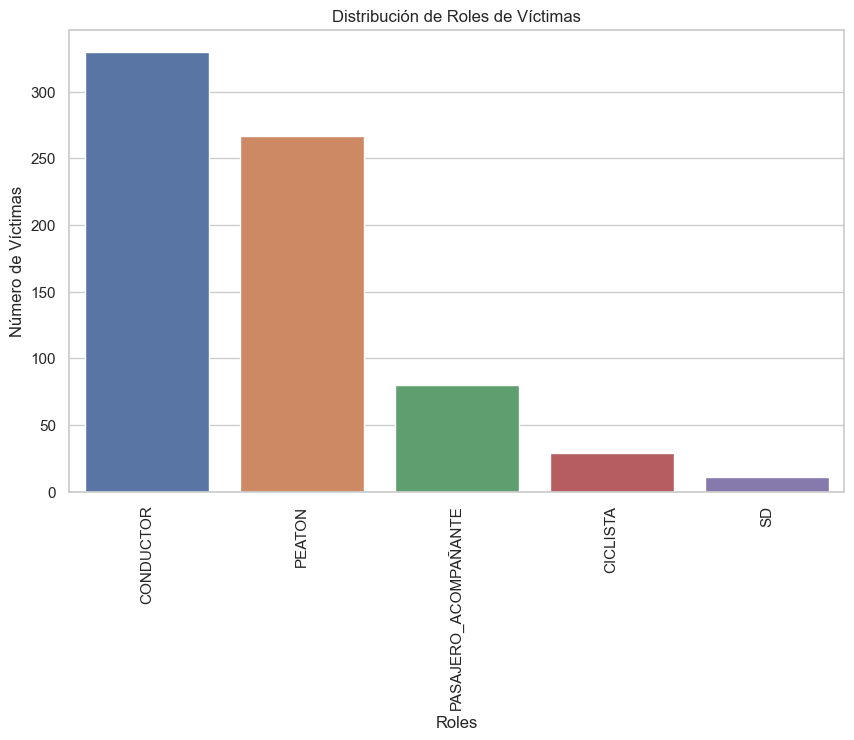

In [223]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_victimas, x='ROL', order=rol_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Roles')
plt.ylabel('Número de Víctimas')
plt.title('Distribución de Roles de Víctimas')
plt.show()


También con un gráfico de torta, podemos graficar la distribución porcentual

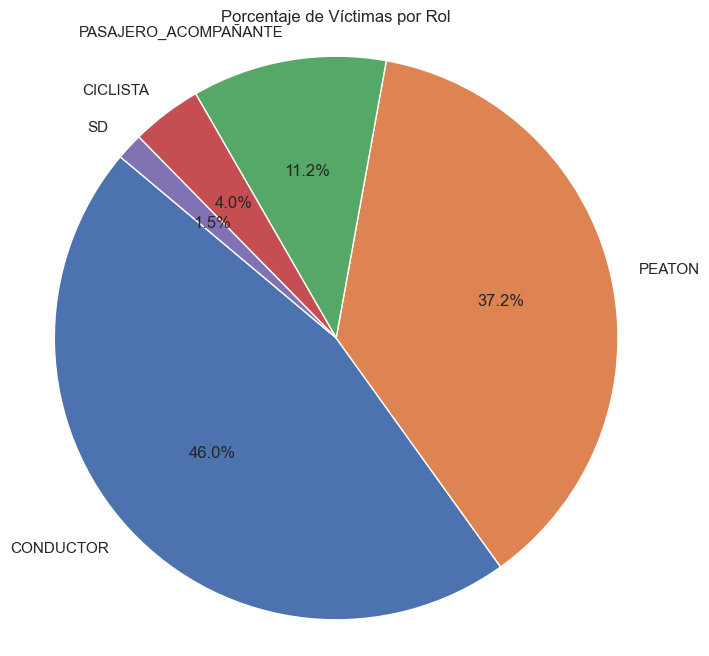

In [224]:
plt.figure(figsize=(8, 8))
plt.pie(rol_counts, labels=rol_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()


Al observar los datos en términos de roles desempeñados en los incidentes, se destaca una distribución interesante. Los conductores representan el mayor porcentaje de casos, con un 46% del total. Esto sugiere que la mayoría de los incidentes involucran a conductores como actores principales en los eventos.

Los peatones también tienen una presencia significativa, abarcando el 37,2% de los casos. Este alto porcentaje refleja la vulnerabilidad de los peatones en las vías y la importancia de las medidas de seguridad para proteger a este grupo.

Los pasajeros o acompañantes, con un 11.2%, constituyen otro grupo significativo en los incidentes. Este porcentaje puede relacionarse con situaciones en las que los pasajeros también se ven afectados por la conducción de terceros.

Los ciclistas, con un 4.18%, representan una proporción menor, pero aún así significativa, de los incidentes. La presencia de ciclistas en las vías también requiere consideración especial en términos de seguridad vial.

Finalmente, la categoría 'SD' (sin datos) representa un pequeño porcentaje del total de casos, con un 1.59%. Estos casos pueden requerir una revisión adicional para garantizar que no haya información faltante o incorrecta.

Este análisis porcentual resalta la diversidad de roles involucrados en los incidentes, subrayando la importancia de enfoques de seguridad vial adaptados a las necesidades específicas de cada grupo, desde conductores hasta peatones y ciclistas, para reducir los incidentes y mejorar la seguridad en las vías

Haremos lo mismo para las columnas "VICTIMA", "SEXO" y "EDAD"

In [225]:
victimas_counts = df_victimas['VICTIMA'].value_counts()
print(victimas_counts)

VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64


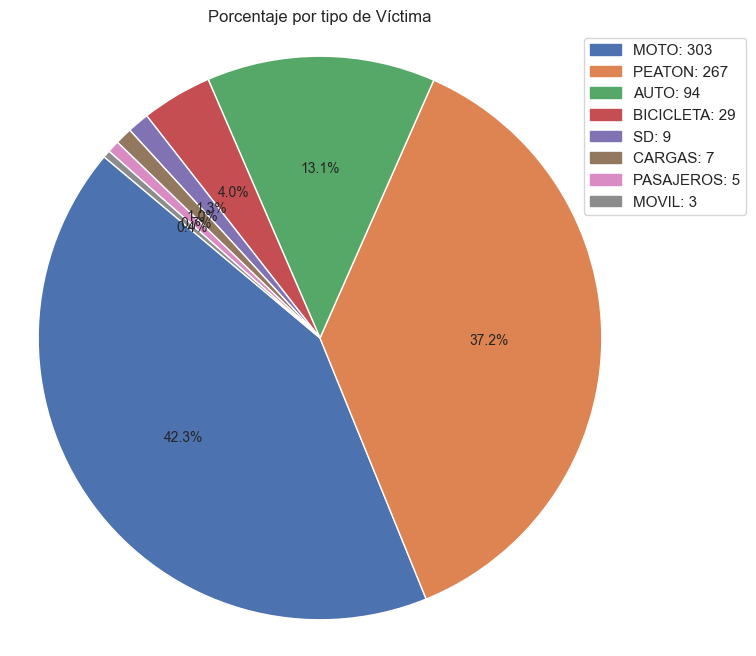

In [226]:
import matplotlib.patches as mpatches

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
pie = plt.pie(victimas_counts, labels=None, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Porcentaje por tipo de Víctima')

# Crear una leyenda personalizada
labels = victimas_counts.index
colors = [item.get_facecolor() for item in pie[0]]
legend_labels = [mpatches.Patch(color=colors[i], label=f'{labels[i]}: {victimas_counts[i]}') for i in range(len(labels))]

# Mostrar la leyenda
plt.legend(handles=legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()



Cuando examinamos la distribución de roles en términos de víctimas en los incidentes, se revela una diversidad de situaciones. Las motocicletas son las víctimas más frecuentes, representando el 42,30% de los casos. Esta alta proporción puede explicarse por la vulnerabilidad de las motocicletas en las vías de tráfico intenso, así como por la prevalencia de servicios de entrega que involucran este tipo de vehículos.

Los peatones también tienen una presencia significativa como víctimas, constituyendo el 37,2% de los incidentes. Esto destaca la importancia de medidas de seguridad para proteger a los peatones en las vías y reducir los incidentes en los que se ven involucrados.

Los automóviles representan un 13,1% de las víctimas en los incidentes, lo que puede estar relacionado con choques entre vehículos o incidentes en los que los automóviles son golpeados por otros actores en la vía.

Los ciclistas, con un 4%, constituyen un grupo menos frecuente de víctimas, pero aún significativo. Esto enfatiza la necesidad de promover la seguridad de los ciclistas en las carreteras.

Las categorías 'SD' (sin datos), 'CARGAS', 'PASAJEROS' y 'MOVIL' tienen una presencia más limitada como víctimas, representando un pequeño porcentaje del total de casos. Estos casos menos frecuentes pueden requerir una revisión adicional para garantizar la integridad de los datos.

In [227]:
sexo_counts = df_victimas['SEXO'].value_counts()
print(sexo_counts)

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


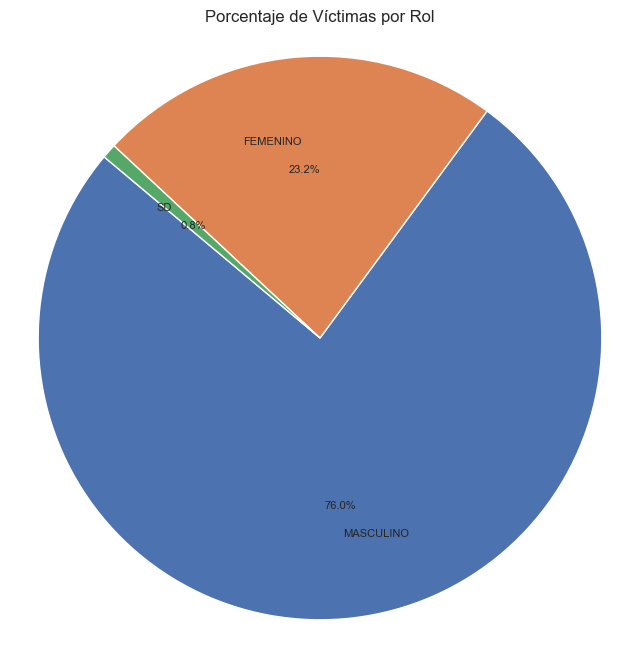

In [228]:
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}, labeldistance=0.7)
plt.axis('equal')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()


In [229]:
sexo_counts = df_victimas['SEXO'].value_counts()
print(sexo_counts)

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


Estos registros con "SD", no son relevantes por lo que decido mantenerlos así.

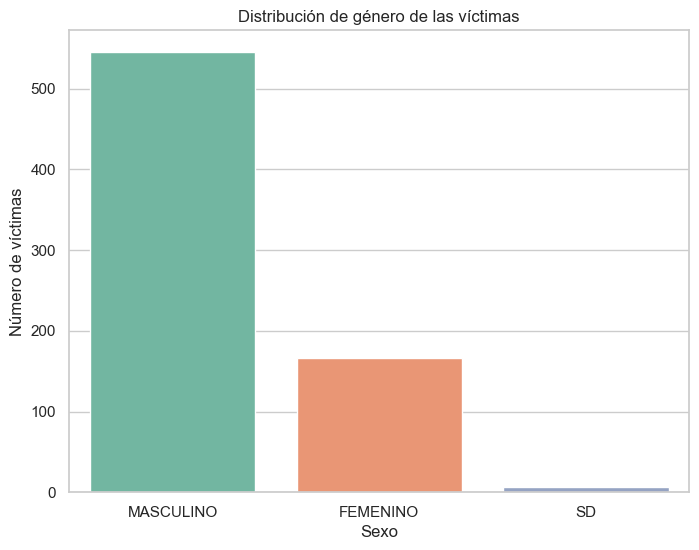

In [230]:
# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=df_victimas, x='SEXO', palette='Set2')
plt.title('Distribución de género de las víctimas')
plt.xlabel('Sexo')
plt.ylabel('Número de víctimas')
plt.show()


In [231]:
# Calcular los porcentajes
sexo_percentages = round((df_victimas['SEXO'].value_counts() / len(df_victimas['SEXO'])) * 100)
sexo_percentages

SEXO
MASCULINO    76.0
FEMENINO     23.0
SD            1.0
Name: count, dtype: float64

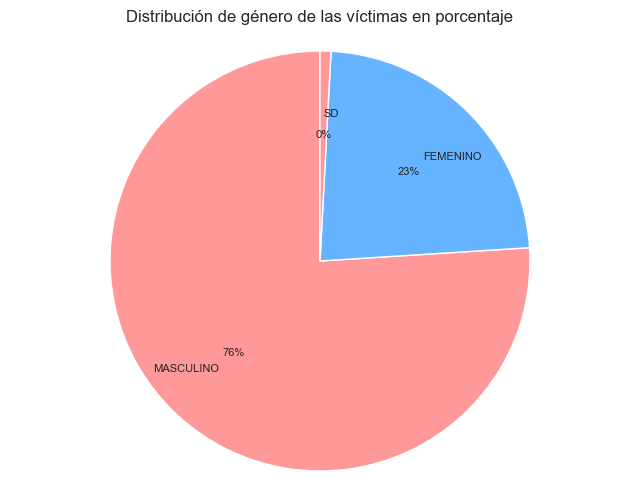

In [232]:
# Calcular los porcentajes
sexo_percentages = (df_victimas['SEXO'].value_counts() / len(df_victimas['SEXO'])) * 100

# Configurar el gráfico de torta
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']  # Colores para las categorías (Femenino y Masculino)

# Crear el gráfico de torta con los porcentajes sin decimales
plt.pie(sexo_percentages, labels=sexo_percentages.index, autopct='%d%%', startangle=90, colors=colors, textprops={'fontsize': 8}, labeldistance=0.7)

# Configurar el título
plt.title('Distribución de género de las víctimas en porcentaje')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.show()




Cuando analizamos la distribución de género en los datos, observamos que los individuos de género masculino representan el 76.0% de los casos, mientras que las personas de género femenino constituyen el 23.0%. Esta diferencia en la distribución de género refleja una prevalencia significativa de individuos de género masculino en los incidentes registrados.

Es importante tener en cuenta que, aunque la mayoría de los registros corresponden a individuos de género masculino, esto no implica necesariamente que sean responsables de los incidentes. La información adicional y un análisis más detallado pueden ayudar a comprender mejor las circunstancias de los incidentes y los roles desempeñados por individuos de diferentes géneros.

También se observa un pequeño porcentaje de registros con la categoría 'SD' (sin datos), que representa el 1.0%. Estos casos pueden requerir una revisión adicional para garantizar la integridad de la información.

Análisis de la variable cuantitativa "EDAD"

In [233]:
edad_counts = df_victimas['EDAD'].value_counts()
print(edad_counts)

EDAD
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64


In [234]:
df_victimas['EDAD'].describe()

count     717
unique     86
top        SD
freq       53
Name: EDAD, dtype: object

El análisis de la columna 'EDAD' en los datos revela una diversidad de edades en los incidentes registrados. En primer lugar, se destaca que un número significativo de registros, específicamente 53, presenta la categoría 'SD', que indica datos sin especificar o ausentes en relación con la edad de los involucrados en los incidentes.

Excluyendo los registros con datos faltantes, se observa una variedad de edades que van desde los 1 hasta los 88 años. El conjunto de datos contiene un total de 86 valores únicos de edad. La edad más frecuente entre los registros es 'SD', lo que sugiere que la información sobre la edad de los involucrados en los incidentes no está completa en una proporción significativa de los casos.

Es importante destacar que, aunque la categoría 'SD' predomina en términos de frecuencia, esto no necesariamente refleja la distribución real de edades en los incidentes. La falta de información sobre la edad en algunos registros puede dificultar la evaluación precisa de la distribución de edades en el conjunto de datos.

En resumen, el análisis de la columna 'EDAD' destaca la necesidad de una recopilación más completa y precisa de datos sobre la edad de los involucrados en los incidentes para facilitar una comprensión más profunda de la distribución de edades y su relevancia en la seguridad vial.

Decido convetir los registros SD a Nan para poder realizar los análisis.

In [235]:
#Reemplazo los valores "SD" por NaN en la columna "EDAD"
df_victimas['EDAD'] = df_victimas['EDAD'].replace('SD', np.nan)

In [236]:
#Convierto la columna "EDAD" a tipo float
df_victimas['EDAD'] = df_victimas['EDAD'].astype(float).round(0)

In [237]:
#Resumen estadístico
resumen_estadistico = df_victimas['EDAD'].describe()
print(resumen_estadistico)


count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64


In [238]:
#Calculo la media, mediana y desviación estándar
media_edad = df_victimas['EDAD'].mean()
mediana_edad = df_victimas['EDAD'].median()
std_edad = df_victimas['EDAD'].std()

#Imprimo los resultados
print(f'Media: {media_edad:.2f}')
print(f'Mediana: {mediana_edad}')
print(f'Desviación Estándar: {std_edad:.2f}')


Media: 42.17
Mediana: 37.0
Desviación Estándar: 19.79


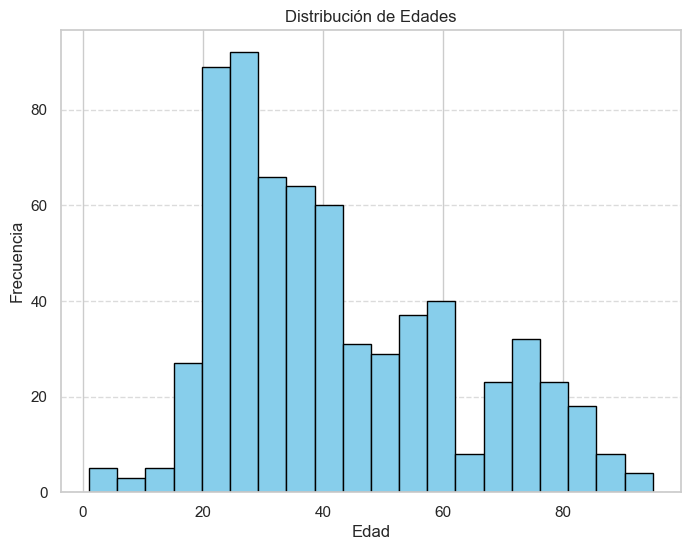

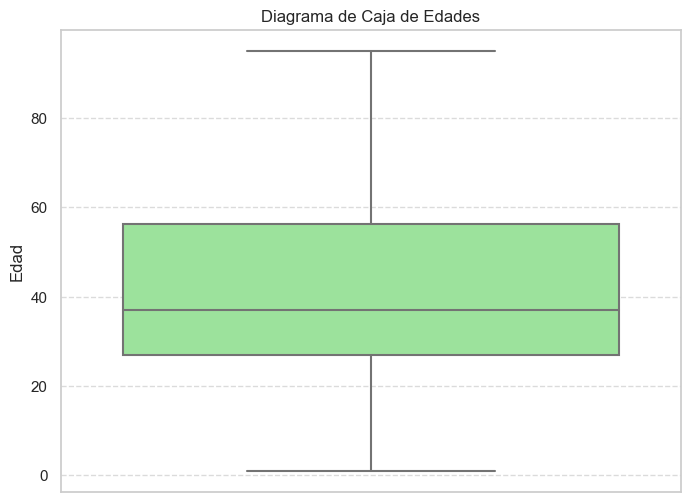

In [239]:
# Histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(df_victimas['EDAD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Box plot de edades
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_victimas, y='EDAD', color='lightgreen')
plt.title('Diagrama de Caja de Edades')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


El histograma de edades muestra la distribución de edades de las víctimas en el conjunto de datos. En el eje horizontal, tenemos la edad, y en el eje vertical, tenemos la frecuencia (es decir, cuántas víctimas tienen cada edad). Algunas observaciones:

La mayoría de las víctimas parecen estar en el rango de edades más jóvenes, con un pico en la frecuencia alrededor de los 30 años.
La media de edad es de aproximadamente 42.17 años, lo que significa que, en promedio, las víctimas tienen alrededor de 42 años.
La mediana, que es el valor que divide el conjunto de datos en dos mitades iguales, es de 37.0 años. Esto indica que el 50% de las víctimas tiene 37 años o menos, y el otro 50% tiene más de 37 años.
La desviación estándar de 19.79 nos indica la dispersión de las edades alrededor de la media. En este caso, la desviación estándar relativamente alta indica que las edades están bastante dispersas y no están muy centradas alrededor de la media.
El mínimo valor de edad en el conjunto de datos es 1 año, lo que sugiere que hay víctimas muy jóvenes.
El primer cuartil (25%) de las edades está en 27 años, lo que significa que el 25% más joven de las víctimas tiene 27 años o menos.
El tercer cuartil (75%) de las edades está en 56.25 años, lo que indica que el 25% más viejo de las víctimas tiene 56.25 años o más.
El máximo valor de edad en el conjunto de datos es de 95 años, lo que indica que hay víctimas de edades avanzadas.

Diagrama de Caja de Edades:

El diagrama de caja muestra la distribución de edades de manera gráfica y nos proporciona una representación visual de los datos.
La línea en el medio de la caja representa la mediana, que es de 37.0 años, lo que concuerda con la mediana calculada anteriormente.
La caja representa el rango intercuartil (IQR) y abarca desde el primer cuartil (25%) hasta el tercer cuartil (75%). El IQR es una medida de la dispersión en el centro de los datos.
Los "bigotes" se extienden desde la caja y representan la dispersión de los datos fuera del IQR. Cualquier punto fuera de los bigotes se considera un valor atípico.
En este caso, parece que hay valores atípicos (puntos individuales) hacia las edades más avanzadas, lo que concuerda con el valor máximo de 95 años.
La longitud de la caja y la posición de la mediana nos dan una idea de la simetría o asimetría de la distribución. En este caso, la caja es más corta en la parte inferior, lo que sugiere una asimetría hacia edades más jóvenes.ra 

# GUARDADO DE DATASETS

Verifico los datasets

In [240]:
df_hechos

ID  N_VICTIMAS      FECHA  AAAA  MM  DD  HH TIPO_DE_CALLE   
0    2016-0001           1 2016-01-01  2016   1   1   4       AVENIDA  \
1    2016-0002           1 2016-01-02  2016   1   2   1      GRAL PAZ   
2    2016-0003           1 2016-01-03  2016   1   3   7       AVENIDA   
3    2016-0004           1 2016-01-10  2016   1  10   0       AVENIDA   
4    2016-0005           1 2016-01-21  2016   1  21   5       AVENIDA   
..         ...         ...        ...   ...  ..  ..  ..           ...   
691  2021-0093           1 2021-12-13  2021  12  13  17       AVENIDA   
692  2021-0094           1 2021-12-20  2021  12  20   1     AUTOPISTA   
693  2021-0095           1 2021-12-30  2021  12  30   0       AVENIDA   
694  2021-0096           1 2021-12-15  2021  12  15  10       AVENIDA   
695  2021-0097           1 2021-11-18  2021  11  18   6         CALLE   

                            Calle   
0                PIEDRA BUENA AV.  \
1                  PAZ, GRAL. AV.   
2                  ENTRE RIOS AV.   
3                  LARRAZABAL AV.   
4                    SAN JUAN AV.   
..                            ...   
691                   RIESTRA AV.   
692  DELLEPIANE, LUIS, TTE. GRAL.   
693                     GAONA AV.   
694                PERON, EVA AV.   
695           PADRE CARLOS MUJICA   

                                 Dirección Normalizada  COMUNA         pos x   
0    PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...       8  -58.47533969  \
1                 PAZ, GRAL. AV. y DE LOS CORRALES AV.       9  -58.50877521   
2                                  ENTRE RIOS AV. 2034       1  -58.39040293   
3            LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.       8  -58.46503904   
4              SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.       1  -58.38718297   
..                                                 ...     ...           ...   
691                                  RIESTRA AV. y MOM       7  -58.43353773   
692         DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.       9  -58.46739825   
693                                GAONA AV. y TERRADA      11  -58.47293407   
694                                PERON, EVA AV. 4071       9  -58.47066794   
695                            PADRE CARLOS MUGICA 709       1  -58.37976155   

            pos y   PARTICIPANTES    VICTIMA    ACUSADO   
0    -34.68757022       MOTO-AUTO       MOTO       AUTO  \
1    -34.66977709  AUTO-PASAJEROS       AUTO  PASAJEROS   
2    -34.63189362       MOTO-AUTO       MOTO       AUTO   
3    -34.68092974         MOTO-SD       MOTO         SD   
4    -34.62246630  MOTO-PASAJEROS       MOTO  PASAJEROS   
..            ...             ...        ...        ...   
691  -34.64561636       MOTO-AUTO       MOTO       AUTO   
692  -34.65117757       MOTO-AUTO       MOTO       AUTO   
693  -34.61984745     MOTO-CARGAS       MOTO     CARGAS   
694  -34.65021673     AUTO-CARGAS       AUTO     CARGAS   
695  -34.58679619  BICICLETA-AUTO  BICICLETA       AUTO   

                                               BARRIOS  
0        Villa Soldati, Villa Riachuelo y Villa Lugano  
1               Liniers, Mataderos y Parque Avellaneda  
2    Retiro, San Nicolás, Puerto Madero, San Telmo,...  
3        Villa Soldati, Villa Riachuelo y Villa Lugano  
4    Retiro, San Nicolás, Puerto Madero, San Telmo,...  
..                                                 ...  
691                          Flores y Parque Chacabuco  
692             Liniers, Mataderos y Parque Avellaneda  
693  Villa General Mitre, Villa Devoto, Villa del P...  
694             Liniers, Mataderos y Parque Avellaneda  
695  Retiro, San Nicolás, Puerto Madero, San Telmo,...  

[696 rows x 17 columns]

In [241]:
df_victimas

ID_hecho                   ROL VICTIMA       SEXO  EDAD
0    2016-0001             CONDUCTOR    MOTO  MASCULINO  19.0
1    2016-0002             CONDUCTOR    AUTO  MASCULINO  70.0
2    2016-0003             CONDUCTOR    MOTO  MASCULINO  30.0
3    2016-0004             CONDUCTOR    MOTO  MASCULINO  18.0
4    2016-0005             CONDUCTOR    MOTO  MASCULINO  29.0
..         ...                   ...     ...        ...   ...
712  2021-0092                PEATON  PEATON   FEMENINO  50.0
713  2021-0093  PASAJERO_ACOMPAÑANTE    MOTO   FEMENINO  18.0
714  2021-0094  PASAJERO_ACOMPAÑANTE    MOTO   FEMENINO  43.0
715  2021-0095             CONDUCTOR    MOTO  MASCULINO  27.0
716  2021-0096             CONDUCTOR    AUTO  MASCULINO  60.0

[717 rows x 5 columns]

In [79]:
df_hechos.to_excel('Tabla_hechos.xlsx')

In [ ]:
df_victimas.to_excel('Tabla_victimas.xlsx')

# Datos poblacionales

https://www.indec.gob.ar/ftp/cuadros/poblacion/cnphv2022_resultados_provisionales.pdf

Reducir en un 30% la cantidad de accidentes mortales de peatones entre 2016 y 2021

Para obtener el valor de los fallecidos a finales de 2015 consulto la siguiente fuente:
Informe estadístico sobre las víctimas fatales a causa de siniestros viales. Ciudad Autónoma de Buenos Aires
Año 2021
https://buenosaires.gob.ar/sites/default/files/2023-04/victimas_fatales_2021_OMSV_%281%29.pdf